In [1]:
##################################################
# Author: Peizhi Yan                             #
# Affiliation: Lakehead University               #
# Personal Website: https://PeizhiYan.github.io  #
# Date: Jan. 23, 2019                            #
##################################################

import os
import tensorflow as tf
from dataset_helper import load_dataset
import matplotlib.pyplot as plt
import time
import numpy as np
from net3 import net # my neural network architecture

os.environ['CUDA_VISIBLE_DEVICES'] = '3'

'''Progress bar'''
#from tqdm import tqdm # terminal should use this
from tqdm import tqdm_notebook as tqdm # Jupyter notebook should use this

DEVICE = '/device:GPU:3'
EPOCHS = 1000
BATCH_SIZE = 8
SAVE_PATH = 'saved_model_net3/'

## Placeholder

In [2]:
with tf.device(DEVICE):
    X = tf.placeholder(tf.float32, [None, 224, 224, 3])

## Load deep neural network structure

In [3]:
with tf.device(DEVICE):
    encoder, X_, loss = net(X, DEVICE, None)

## Loss function and optimizer

In [4]:
with tf.device(DEVICE):
    optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)
    
    sess = tf.Session(config=tf.ConfigProto(log_device_placement=False,allow_soft_placement=True))

## Load dataset

In [5]:
t1 = time.time()
dataset = load_dataset('CelebaDataset/img_align_celeba/', 10000)
t2 = time.time()
print('Time used in loading dataset (in seconds): ',(t2-t1))
print('Number of images loaded: ',len(dataset))

Time used in loading dataset (in seconds):  20.252654314041138
Number of images loaded:  10000


## Initialize the parameters

In [6]:
with tf.device(DEVICE):
    init = tf.global_variables_initializer()
    sess.run(init)
    saver = tf.train.Saver()
    #saver.restore(sess, SAVE_PATH+'model.ckpt')

## Train the network

In [ ]:
with tf.device(DEVICE):
    epoch = 0
    while epoch < EPOCHS:
        total_steps = int(len(dataset)/BATCH_SIZE)
        loss_value = 0
        for step in tqdm(range(total_steps), desc=('Epoch '+str(epoch))):
            """get training batch"""
            if step*BATCH_SIZE + BATCH_SIZE < len(dataset):
                BATCH_X = dataset[step*BATCH_SIZE: step*BATCH_SIZE+BATCH_SIZE]
            else:
                BATCH_X = dataset[step*BATCH_SIZE:]
            """train"""
            [loss_value,_] = sess.run([loss, optimizer], feed_dict={X: BATCH_X})

        """end of epoch"""
        print('Epoch loss = ',loss_value)

        """save the model"""
        saver.save(sess, SAVE_PATH+'model_'+str(epoch)+'.ckpt') # save the model

        epoch+=1
        
        """to save space, after every 10 epochs, epoch start from 0"""
        if epoch == 10:
            epoch = 0
            """after 10 epochs, randomly load some images from whole dataset to replace some images of the training set"""
            tmp = load_dataset('CelebaDataset/img_align_celeba/', 500)
            dataset = dataset[np.random.permutation(len(dataset))]
            dataset[:len(tmp)] = tmp[:]


Epoch loss =  0.514111


Epoch loss =  0.513984


Epoch loss =  0.513482


Epoch loss =  0.512811


Epoch loss =  0.512453


Epoch loss =  0.513023


Epoch loss =  0.512146


Epoch loss =  0.512243


Epoch loss =  0.512377


Epoch loss =  0.511732


Epoch loss =  0.464134


Epoch loss =  0.464181


Epoch loss =  0.463982


Epoch loss =  0.464059


Epoch loss =  0.464266


Epoch loss =  0.463282


Epoch loss =  0.462994


Epoch loss =  0.466183


Epoch loss =  0.463086


## Manually testing

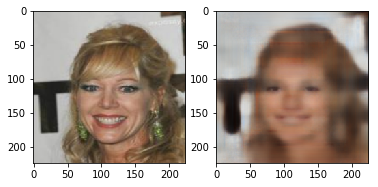

In [12]:
img = np.array([dataset[3]])

img_= sess.run(X_, feed_dict={X:img})
img_ = img_[0]

plt.subplot(1,2,1)
plt.imshow(img[0])

plt.subplot(1,2,2)
plt.imshow(img_)

plt.show()

## Hybrid face

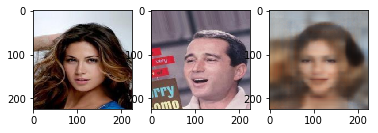

In [13]:
img1 = np.array([dataset[11]])
img2 = np.array([dataset[22]])
img3 = (img1 + img2)/2

img_= sess.run(X_, feed_dict={X:img3})
img_ = img_[0]

plt.subplot(1,3,1)
plt.imshow(img1[0])

plt.subplot(1,3,2)
plt.imshow(img2[0])

plt.subplot(1,3,3)
plt.imshow(img_)

plt.show()

## Noise removal

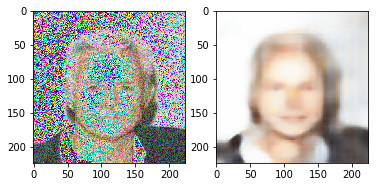

In [14]:
img = np.array([dataset[6]])
noize = np.random.rand(224,224,3)/2.2
img = img+noize

img_= sess.run(X_, feed_dict={X:img})
img_ = img_[0]

plt.subplot(1,2,1)
plt.imshow(img[0])

plt.subplot(1,2,2)
plt.imshow(img_)

plt.show()

In [15]:
with tf.device(DEVICE):
    saver = tf.train.Saver()
    saver.save(sess, SAVE_PATH+'model_wow.ckpt') # save the model
